# **Week 2: Regressor**

### **TAs: Chiku Parida (chipa@dtu.dk), Dr. Dipendu Roy (dipro@dtu.dk)**

## **Objectives:**
- Understand the concept of regression analysis.
- Implement a simple linear regression model using Python.
- Evaluate the performance of the regression model.



### Load the Dataset

- The dataset is a CSV file containing chemicals and their associated features.

In [3]:
import pandas as pd
df=pd.read_csv("data_regression.csv")

In [2]:
print(df.head())
print(df.info())

   name  experimental_band_gap  phonon_cutoff_frequency  \
0   LiF                   13.6                   19.599   
1  LiCl                    9.4                   12.531   
2  LiBr                    7.6                   11.188   
3   LiI                    6.1                    9.701   
4   NaF                   11.5                   12.275   

   mean_phonon_frequency  electronic_contribution_of_dielectric_constant  \
0                 10.435                                           2.068   
1                  6.301                                           3.150   
2                  4.934                                           3.664   
3                  4.113                                           4.465   
4                  7.416                                           1.821   

   total_dielectric_constant  nearest_neighbor_distance  density  \
0                      7.936                      1.943    2.938   
1                     10.003                      2.

### Based on the simple description above, lets look into the feature columns and the target column.

In [4]:
categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()
numerical_cols = df.select_dtypes(include=['number']).columns.tolist()

print("Categorical columns:", categorical_cols)
print("Numerical columns:", numerical_cols)

Categorical columns: ['name', 'structure', 'category']
Numerical columns: ['experimental_band_gap', 'phonon_cutoff_frequency', 'mean_phonon_frequency', 'electronic_contribution_of_dielectric_constant', 'total_dielectric_constant', 'nearest_neighbor_distance', 'density', 'bulk_modulus', 'log_breakdown_field']


In [5]:
for col in categorical_cols:
    print(f"Column: {col}")
    print(df[col].unique())
    print("-" * 40)

Column: name
['LiF' 'LiCl' 'LiBr' 'LiI' 'NaF' 'NaCl' 'NaBr' 'NaI' 'KF' 'KCl' 'KBr' 'KI'
 'RbF' 'RbCl' 'RbBr' 'RbI' 'CsF' 'CsCl' 'CsBr' 'CsI' 'CuCl' 'CuBr' 'CuI'
 'AgF' 'AgCl' 'AgBr' 'AgI' 'TICl' 'TlBr' 'TlI' 'BeS' 'BeSe' 'BeTe' 'MgO'
 'MgS' 'MgSe' 'MgTe' 'Ca0' 'CaS' 'CaSe' 'CaTe' 'SrO' 'SrS' 'SrSe' 'SrTe'
 'BaO' 'BaS' 'BaSe' 'BaTe' 'MnO' 'FeO' 'CoO' 'NiO' 'C' 'Si' 'Ge' 'SiC'
 'SiGe' 'BN' 'BP' 'BAs' 'AIN' 'AlP' 'AlAs' 'AlSb' 'GaN' 'GaP' 'GaAs'
 'GaSb' 'InN' 'InP' 'InAs' 'InSb' 'ZnO' 'ZnS' 'ZnSe' 'ZnTe' 'CdO' 'CdS'
 'CdSe' 'CdTe' 'HgO']
----------------------------------------
Column: structure
['RS' 'CC' 'ZB']
----------------------------------------
Column: category
['Alkali_metal_halides' 'Transition_metal_halides'
 'Post-_transition_metal_halides' 'Alkaline_earth_metal_chalcogenides'
 'Transition_metal_oxide' 'Group_IV_semiconductor'
 'Group_III-V_semiconductor' 'Group_II-VI_semiconductor']
----------------------------------------


In [6]:
for col in categorical_cols:
    n_unique = df[col].nunique(dropna=False)  
    print(f"{col}: {n_unique} unique values")

name: 82 unique values
structure: 3 unique values
category: 8 unique values


## Preliminary data exploration and visualization

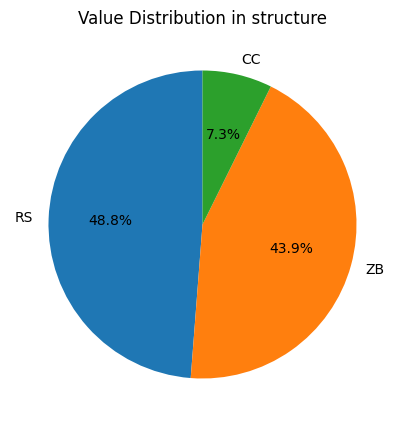

In [7]:
import matplotlib.pyplot as plt

plt.figure(figsize=(5, 5))
df['structure'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90)
plt.title('Value Distribution in structure')
plt.ylabel('')
plt.show()

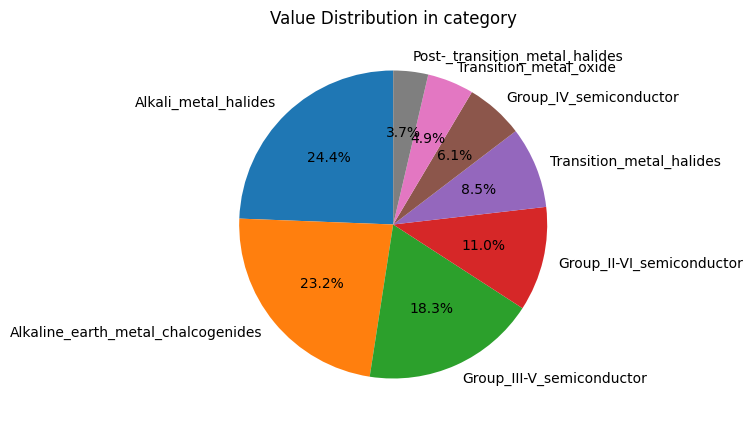

In [8]:
import matplotlib.pyplot as plt

plt.figure(figsize=(5, 5))
df['category'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90)
plt.title('Value Distribution in category')
plt.ylabel('')
plt.show()

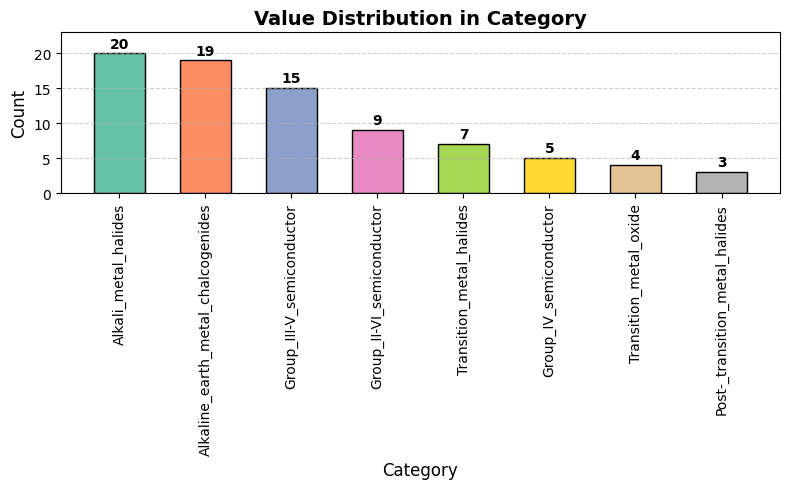

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

value_counts = df['category'].value_counts()

colors = sns.color_palette('Set2', len(value_counts))

plt.figure(figsize=(8, 5))
bars = plt.bar(value_counts.index, value_counts.values, color=colors, edgecolor='black', width=0.6)

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + value_counts.max() * 0.02,
             f'{int(yval)}', ha='center', va='bottom', fontsize=10, fontweight='bold')

# Styling
plt.title('Value Distribution in Category', fontsize=14, fontweight='bold')
plt.xlabel('Category', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=90, fontsize=10)
plt.yticks(fontsize=10)
plt.ylim(0, value_counts.max() * 1.15)  
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

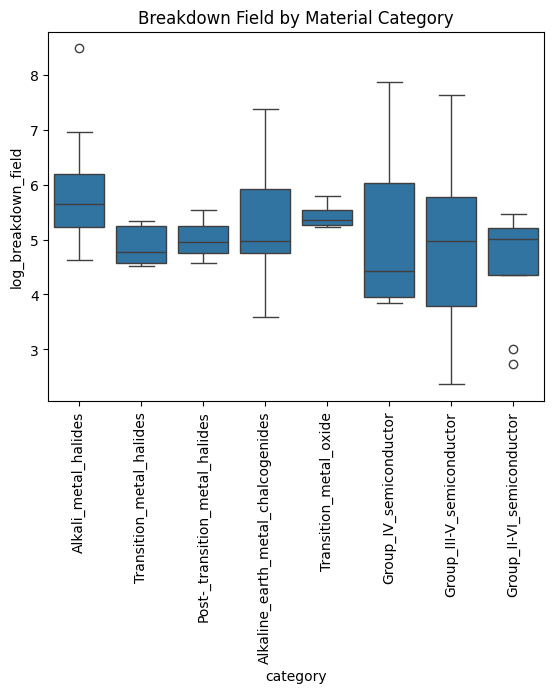

In [10]:
sns.boxplot(data=df, x='category', y='log_breakdown_field')
plt.xticks(rotation=90)
plt.title('Breakdown Field by Material Category')
plt.show()

Text(0.5, 1.0, 'Distribution of Target Variable')

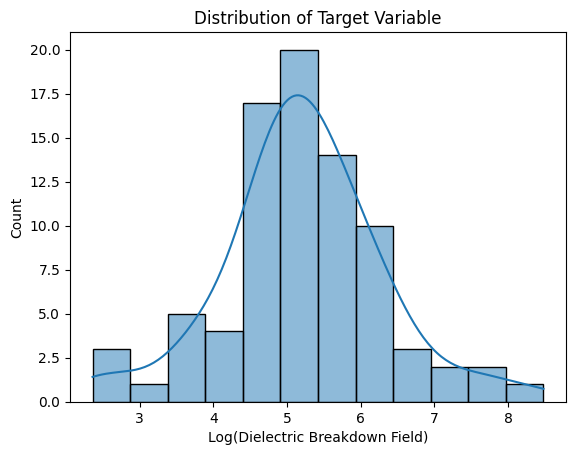

In [11]:
import seaborn as sns
sns.histplot(df['log_breakdown_field'], kde=True)
plt.xlabel("Log(Dielectric Breakdown Field)")
plt.title("Distribution of Target Variable")

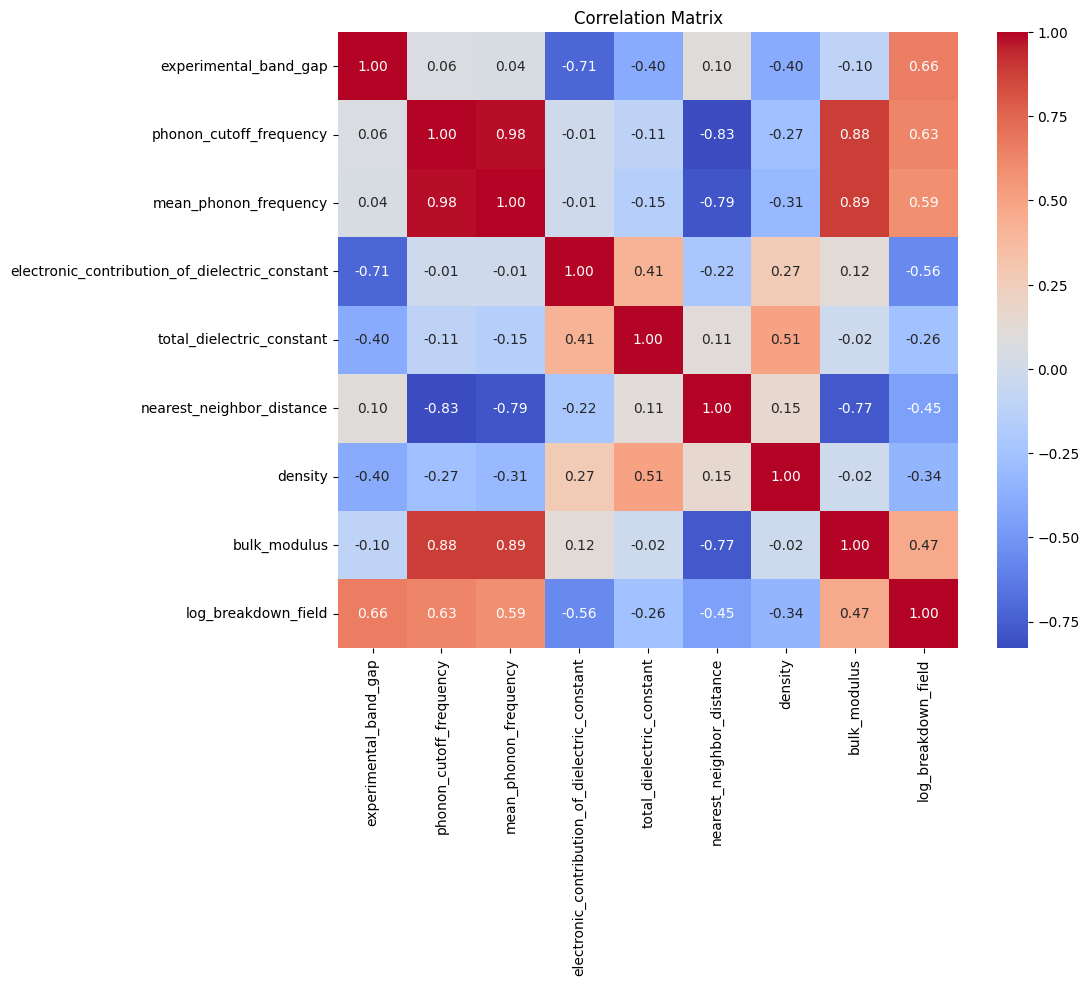

In [12]:
numerical_cols = ['experimental_band_gap', 'phonon_cutoff_frequency', 'mean_phonon_frequency',
                  'electronic_contribution_of_dielectric_constant', 'total_dielectric_constant',
                  'nearest_neighbor_distance', 'density', 'bulk_modulus', 'log_breakdown_field']

plt.figure(figsize=(10,8))
sns.heatmap(df[numerical_cols].corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

In [13]:
df.groupby('category')[numerical_cols].mean().style.background_gradient(cmap='viridis')

,experimental_band_gap,phonon_cutoff_frequency,mean_phonon_frequency,electronic_contribution_of_dielectric_constant,total_dielectric_constant,nearest_neighbor_distance,density,bulk_modulus,log_breakdown_field
category,,,,,,,,,
Alkali_metal_halides,8.320000,8.072850,4.528050,2.901650,6.674000,2.891650,4.024650,38.161500,5.789666
Alkaline_earth_metal_chalcogenides,4.436842,11.249579,6.432684,5.525263,14.188789,2.746737,4.378842,73.445000,5.253040
Group_II-VI_semiconductor,2.333333,9.589111,5.540444,7.521000,11.382667,2.423556,6.288778,87.005556,4.551473
Group_III-V_semiconductor,2.226667,16.055933,9.989133,11.308667,13.535067,2.263933,4.885200,129.346333,4.909073
Group_IV_semiconductor,2.120000,20.555200,13.897600,13.408200,14.078200,2.099400,3.811400,187.018400,5.231089
Post-_transition_metal_halides,3.066667,4.232667,1.896000,7.214000,35.092667,3.196000,9.371333,37.564333,5.020935
Transition_metal_halides,3.928571,5.971857,3.414857,6.044857,9.020429,2.564714,6.083286,62.852714,4.895504
Transition_metal_oxide,3.150000,13.151250,6.422000,12.935750,16.469000,2.146000,6.190750,197.651750,5.433890


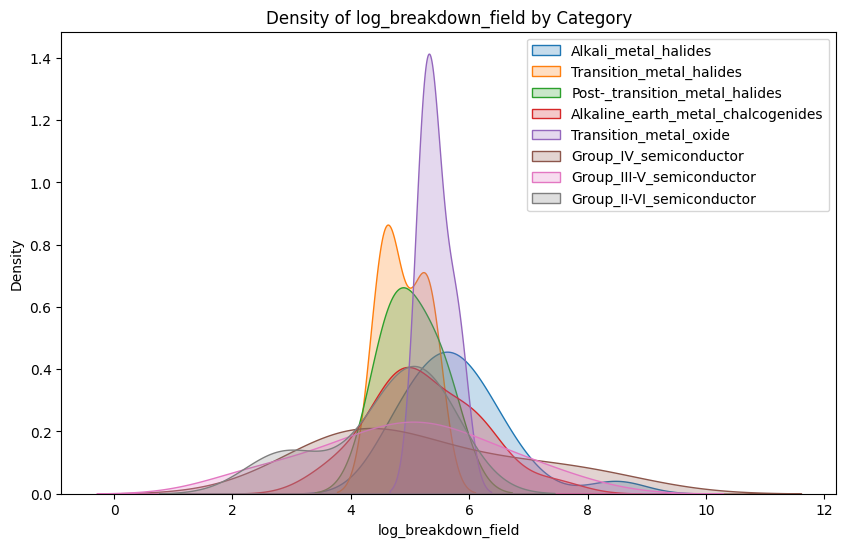

In [14]:
plt.figure(figsize=(10, 6))
for cat in df['category'].unique():
    sns.kdeplot(df[df['category'] == cat]['log_breakdown_field'], label=cat, fill=True)
plt.title("Density of log_breakdown_field by Category")
plt.legend()
plt.show()

In [15]:
from sklearn.preprocessing import LabelEncoder

df['structure'] = LabelEncoder().fit_transform(df['structure'])
df['category'] = LabelEncoder().fit_transform(df['category'])

In [16]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=['name', 'log_breakdown_field'])  
y = df['log_breakdown_field']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

R2 score: 0.630
RMSE: 0.639


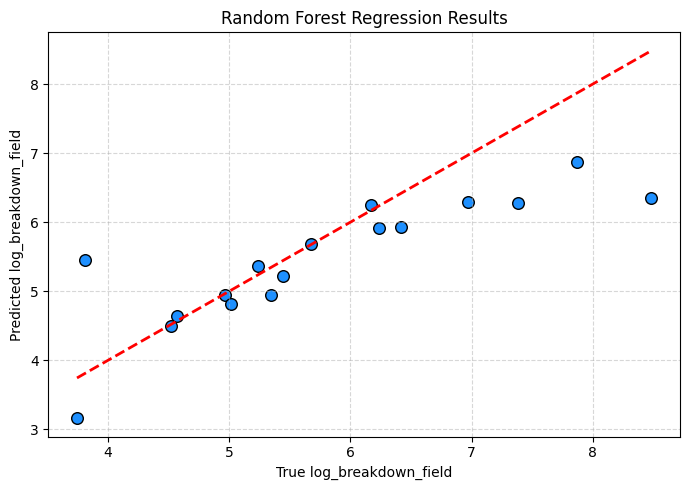

In [17]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

import matplotlib.pyplot as plt

# Train a regressor
reg = RandomForestRegressor(random_state=42)
reg.fit(X_train, y_train)

# Predict
y_pred = reg.predict(X_test)

# Metrics
r2 = r2_score(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred)

print(f"R2 score: {r2:.3f}")
print(f"RMSE: {rmse:.3f}")

# Plot
plt.figure(figsize=(7,5))
plt.scatter(y_test, y_pred, color='dodgerblue', edgecolor='k', s=70)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel("True log_breakdown_field")
plt.ylabel("Predicted log_breakdown_field")
plt.title("Random Forest Regression Results")
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

R2 score: 0.648
RMSE: 0.608


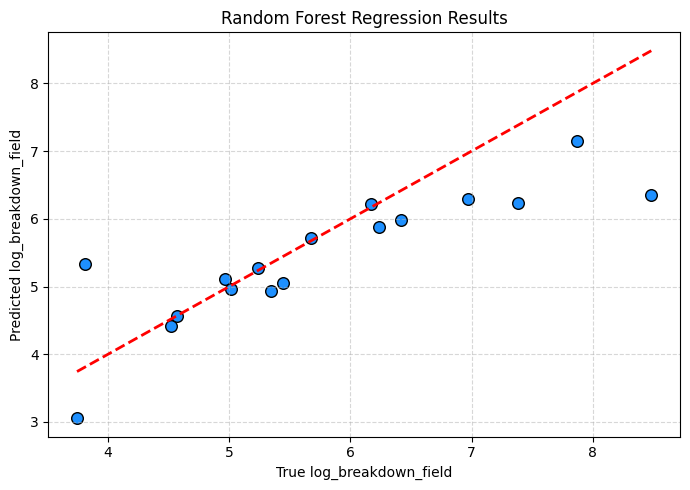

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

import matplotlib.pyplot as plt

# Train a regressor
reg = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)
reg.fit(X_train, y_train)

# Predict
y_pred = reg.predict(X_test)

# Metrics
r2 = r2_score(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred)

print(f"R2 score: {r2:.3f}")
print(f"RMSE: {rmse:.3f}")

# Plot
plt.figure(figsize=(7,5))
plt.scatter(y_test, y_pred, color='dodgerblue', edgecolor='k', s=70)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel("True log_breakdown_field")
plt.ylabel("Predicted log_breakdown_field")
plt.title("Random Forest Regression Results")
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

## Questions:

1. **Which hyperparameters of `RandomForestRegressor` are most critical to tune for improved regression performance?**
    - Refer to the [RandomForestRegressor documentation](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html)

2. **How can we systematically search for the best hyperparameter values?**
    - Should we use grid search, random search?

3. **What metric(s) should be used to evaluate model performance during hyperparameter tuning?**
    - Is RMSE, R², or another metric most appropriate for this task?

4. **How do we avoid overfitting while tuning hyperparameters?**
    - Should we use cross-validation, and if so, what kind (e.g., k-fold)?

5. **What ranges or values should be considered for each hyperparameter?**
    - e.g. "n_estimators", "max_depth"

6. **How does changing each hyperparameter affect model interpretability and computational cost?**
    - Are there trade-offs between accuracy and training time?

7. **Should feature selection or engineering be performed before hyperparameter tuning?**
    - How might this impact the results?

## Now its time try some other regressors we studied during the morning session.

1. [Linear Regression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)
2. [Decision Tree Regressor](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html)
3. [Gradient Boosting Regressor](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingRegressor.html)
4. [XGBoost Regressor](https://xgboost.readthedocs.io/en/latest/python/python_api.html#xgboost.XGBRegressor)
5. [AdaBoost Regressor](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostRegressor.html)

